<a href="https://colab.research.google.com/github/Afina78/Afina78/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [49]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births-in-cal.csv to daily-total-female-births-in-cal.csv
Saving international-airline-passengers.csv to international-airline-passengers.csv
Saving mean-monthly-air-temperature-deg.csv to mean-monthly-air-temperature-deg.csv
Saving monthly-boston-armed-robberies-j.csv to monthly-boston-armed-robberies-j.csv
Saving monthly-sales-of-company-x-jan-6.csv to monthly-sales-of-company-x-jan-6.csv
Saving weekly-closings-of-the-dowjones-.csv to weekly-closings-of-the-dowjones-.csv


In [50]:
# Функция для загрузки временного ряда с обработкой дат
def load_series(file_path):
    df = pd.read_csv(file_path)

    # Унифицируем названия колонок
    df.columns = ['Date', 'Value']

    # Попробуем несколько способов преобразования даты
    try:
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Пробуем обычный формат
    except ValueError:
        try:
            df['Date'] = pd.to_datetime(df['Date'] + '-1', format='%Y-W%W-%w')  # Обрабатываем формат недели
        except ValueError:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Последний шанс (если формат неизвестен)

    # Удаляем строки с некорректными датами
    df = df.dropna(subset=['Date'])

    # Устанавливаем дату как индекс
    df.set_index('Date', inplace=True)

    return df

In [51]:
# Функция для тестирования стационарности временного ряда (тест Дики-Фуллера)
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [52]:
# Функция для визуализации временного ряда и его ACF/PACF-графиков
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Original')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB
None
            Value
Date             
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
None
            Value
Date             
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   1

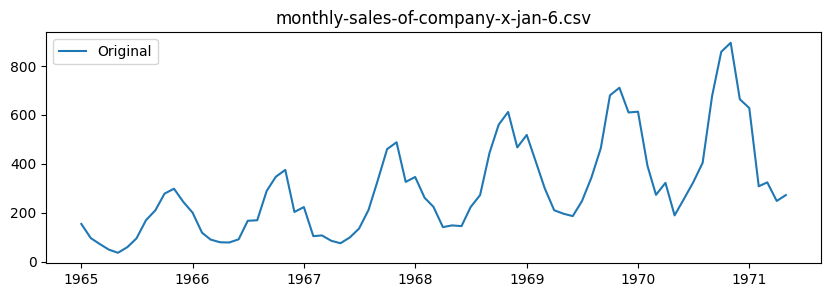

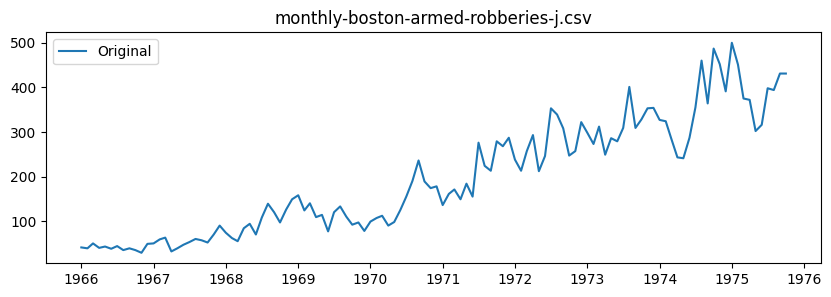

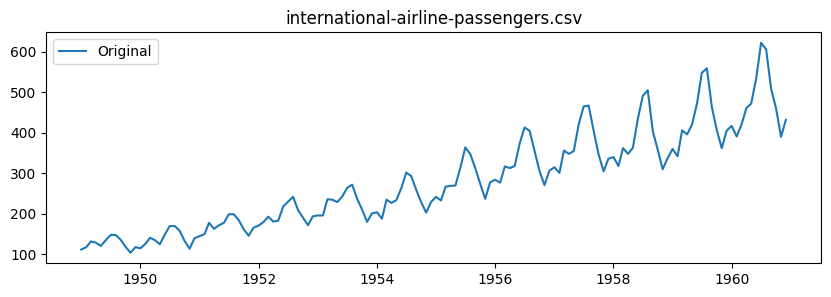

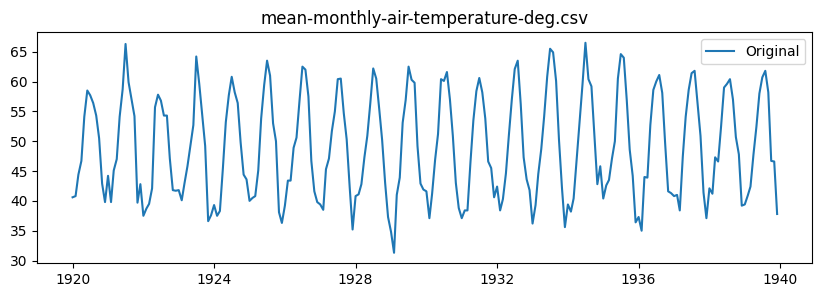

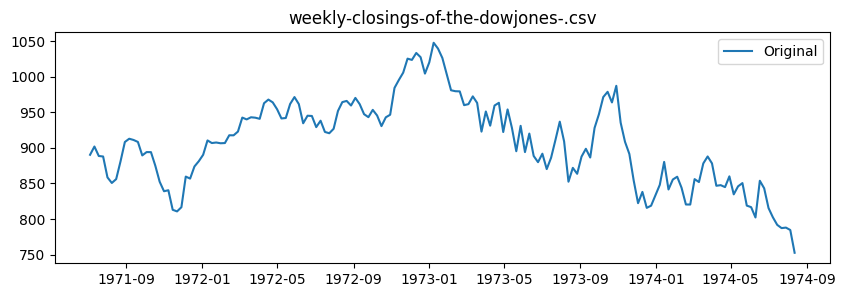

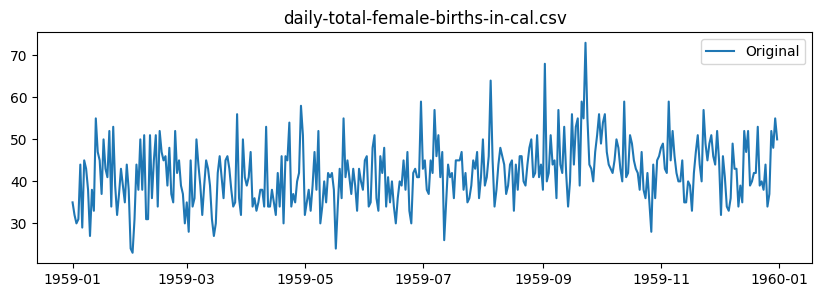

In [53]:
# Обрабатываем файлы с временными рядами
files = [
    'monthly-sales-of-company-x-jan-6.csv',
    'monthly-boston-armed-robberies-j.csv',
    'international-airline-passengers.csv',
    'mean-monthly-air-temperature-deg.csv',
    'weekly-closings-of-the-dowjones-.csv',
    'daily-total-female-births-in-cal.csv'
]

for i, file in enumerate(files, 1):
    df = load_series(file)  # Загружаем данные
    print(df.info())  # Проверяем инфо
    print(df.head())   # Смотрим первые строки

    # Создаем новый график для каждого файла
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df['Value'], label='Original')
    plt.legend()
    plt.title(file)

plt.show()  # Показываем все графики сразу


Файл: monthly-sales-of-company-x-jan-6.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB
None
            Value
Date             
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 1000x400 with 0 Axes>

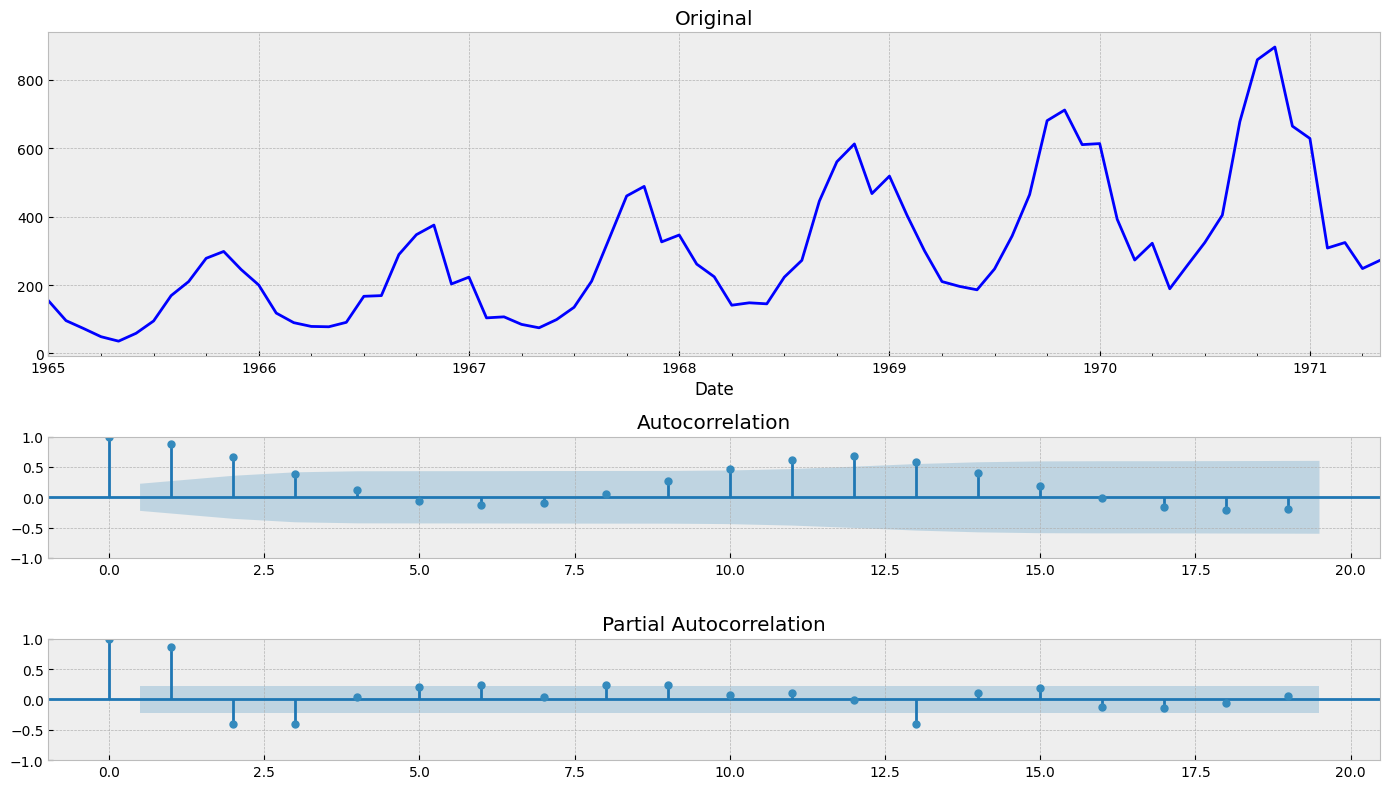

Results of Dickey-Fuller Test:
Test Statistic                 -0.631279
p-value                         0.863757
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 1000x400 with 0 Axes>

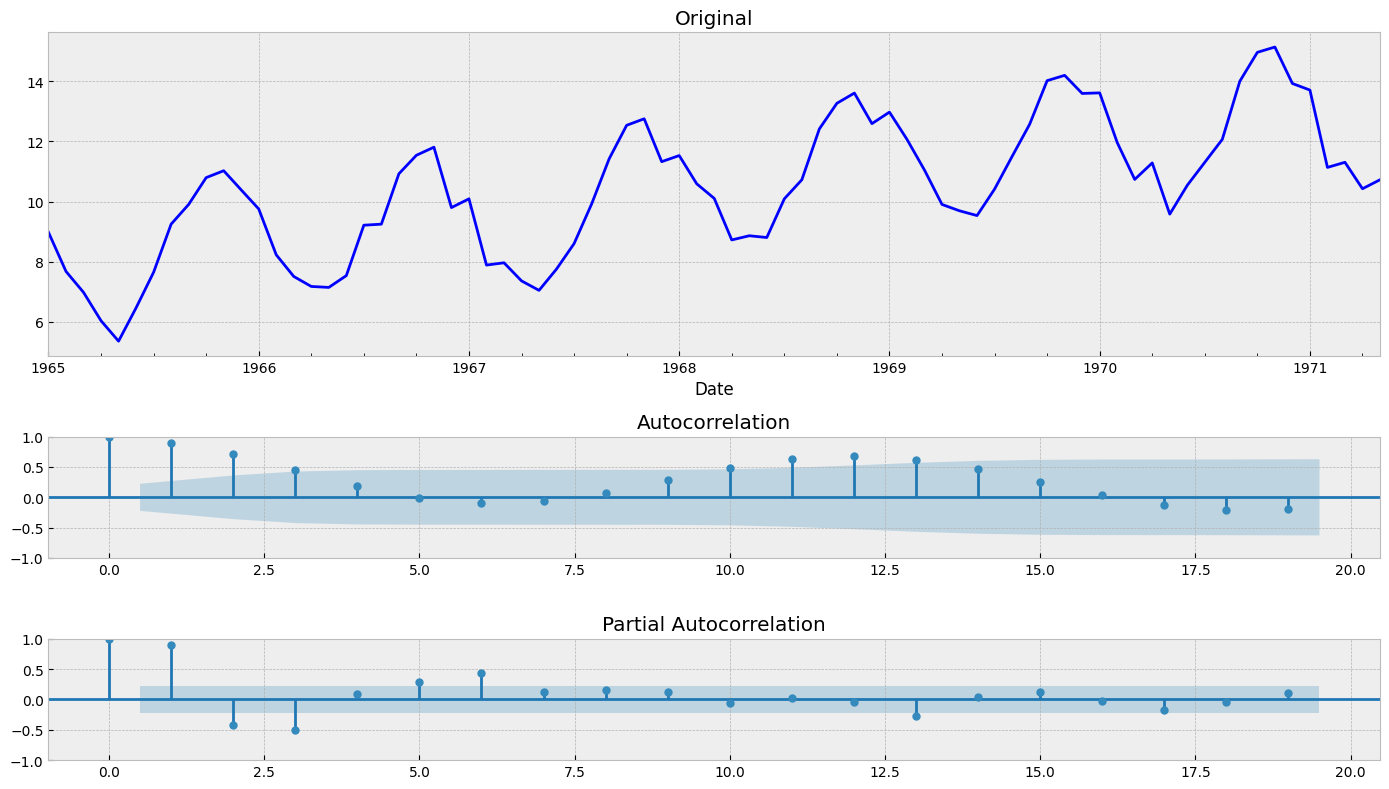

Results of Dickey-Fuller Test:
Test Statistic                 -3.284204
p-value                         0.015599
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 1000x400 with 0 Axes>

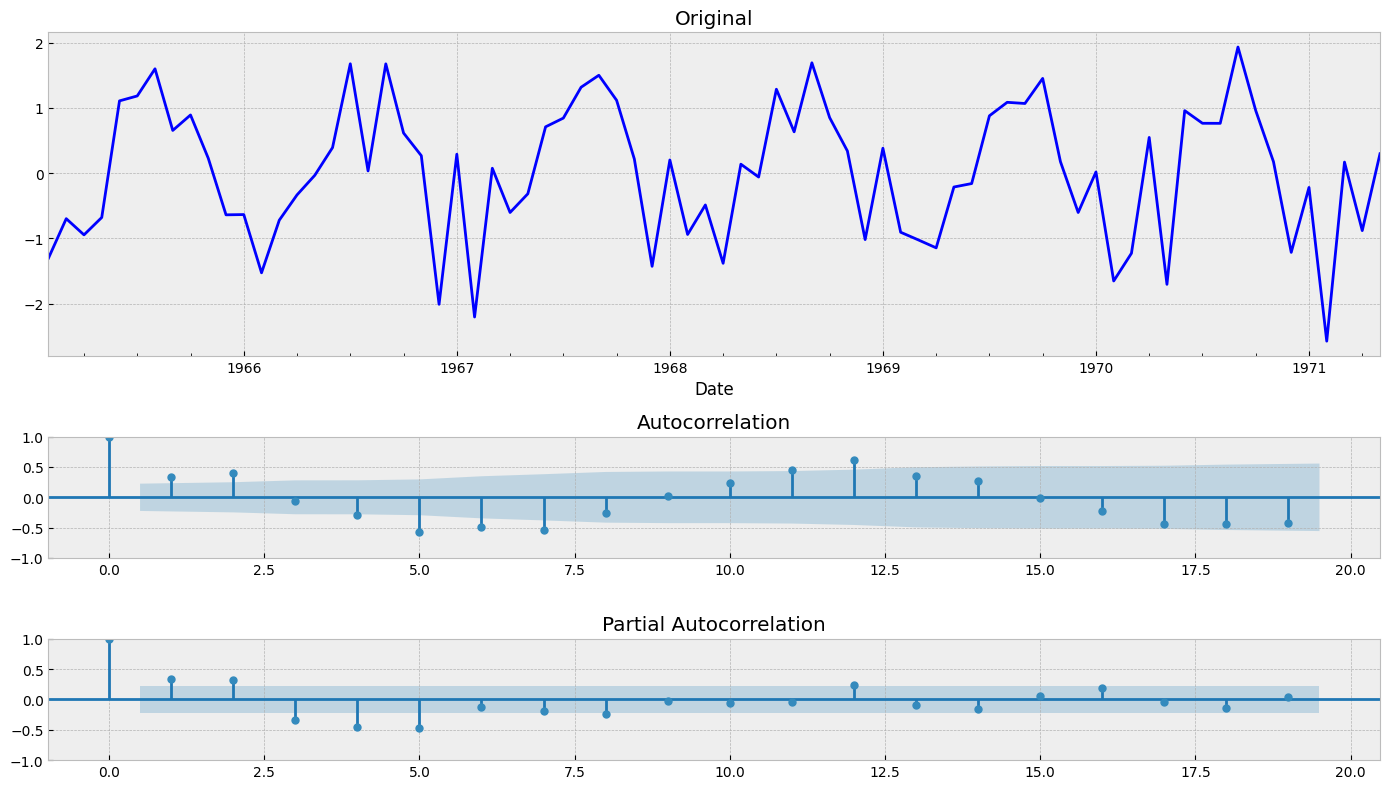

Results of Dickey-Fuller Test:
Test Statistic                 -2.351250
p-value                         0.155971
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


<Figure size 1000x400 with 0 Axes>

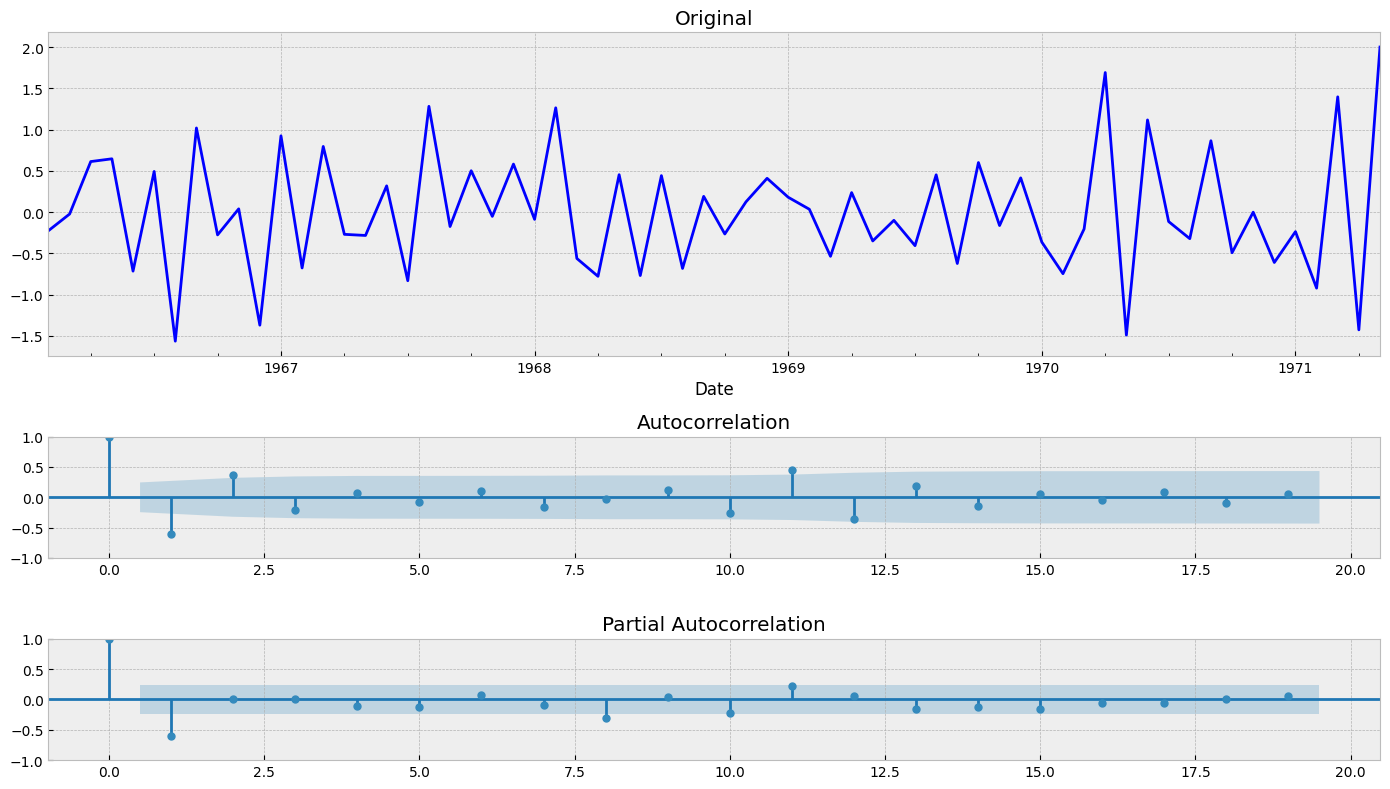

Файл: monthly-boston-armed-robberies-j.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
None
            Value
Date             
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


<Figure size 1000x400 with 0 Axes>

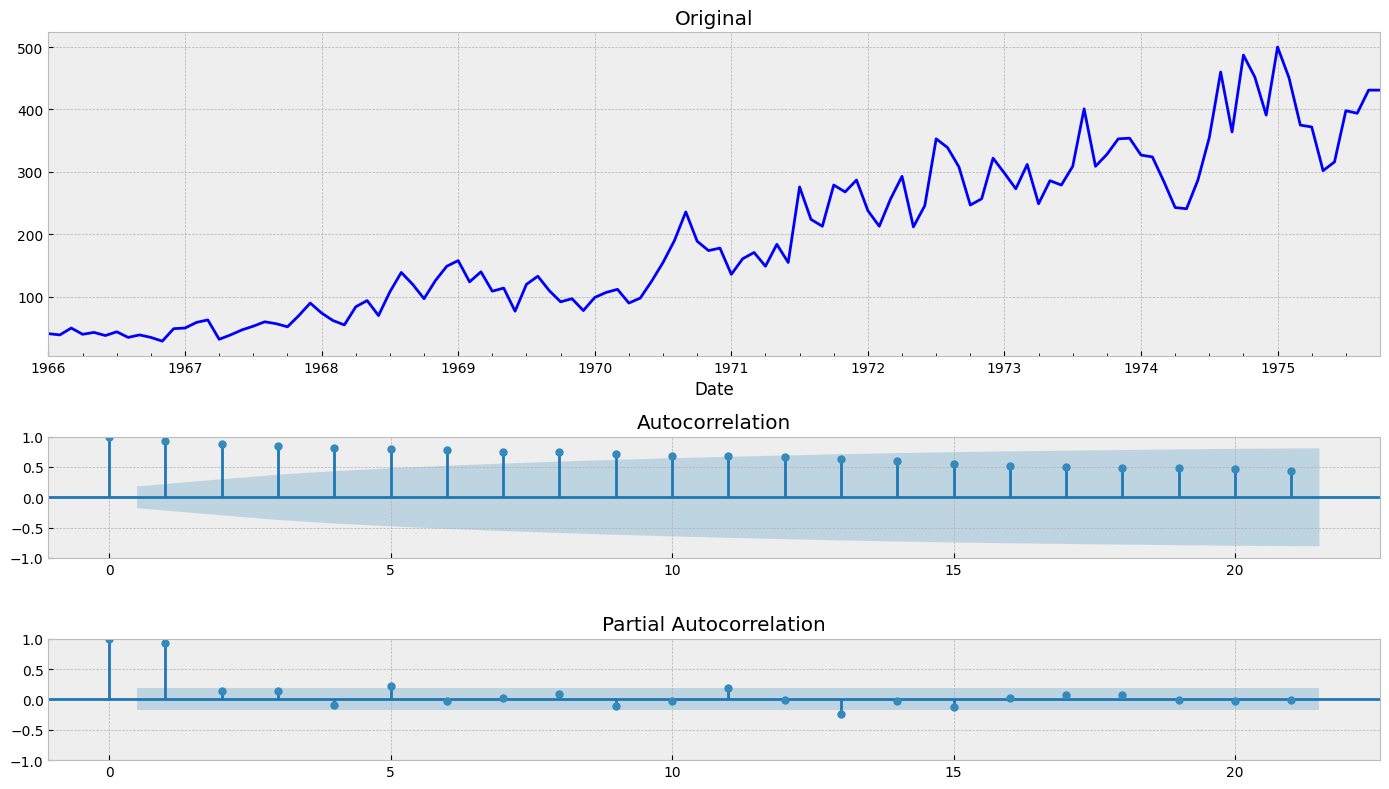

Results of Dickey-Fuller Test:
Test Statistic                  -0.876346
p-value                          0.795662
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


<Figure size 1000x400 with 0 Axes>

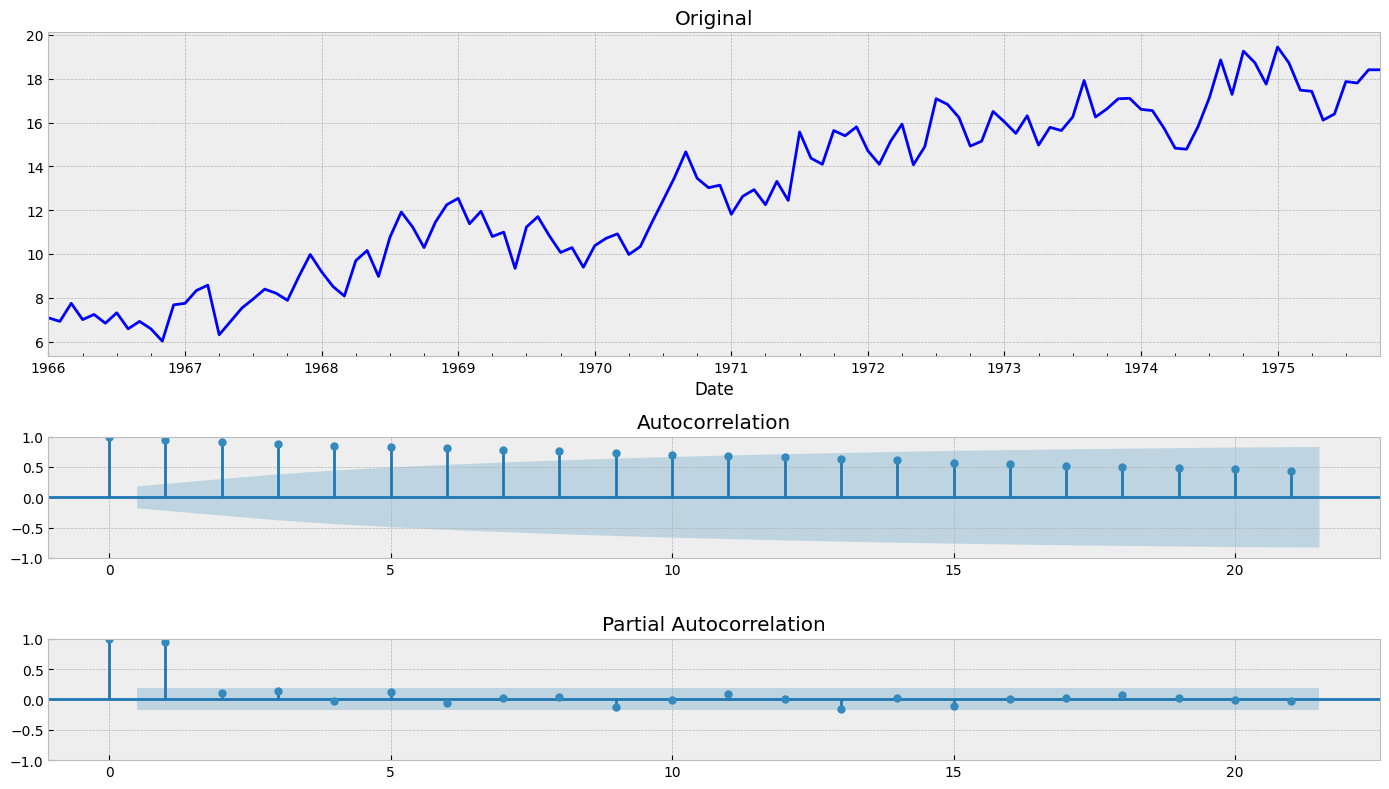

Results of Dickey-Fuller Test:
Test Statistic                -5.862061e+00
p-value                        3.392204e-07
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

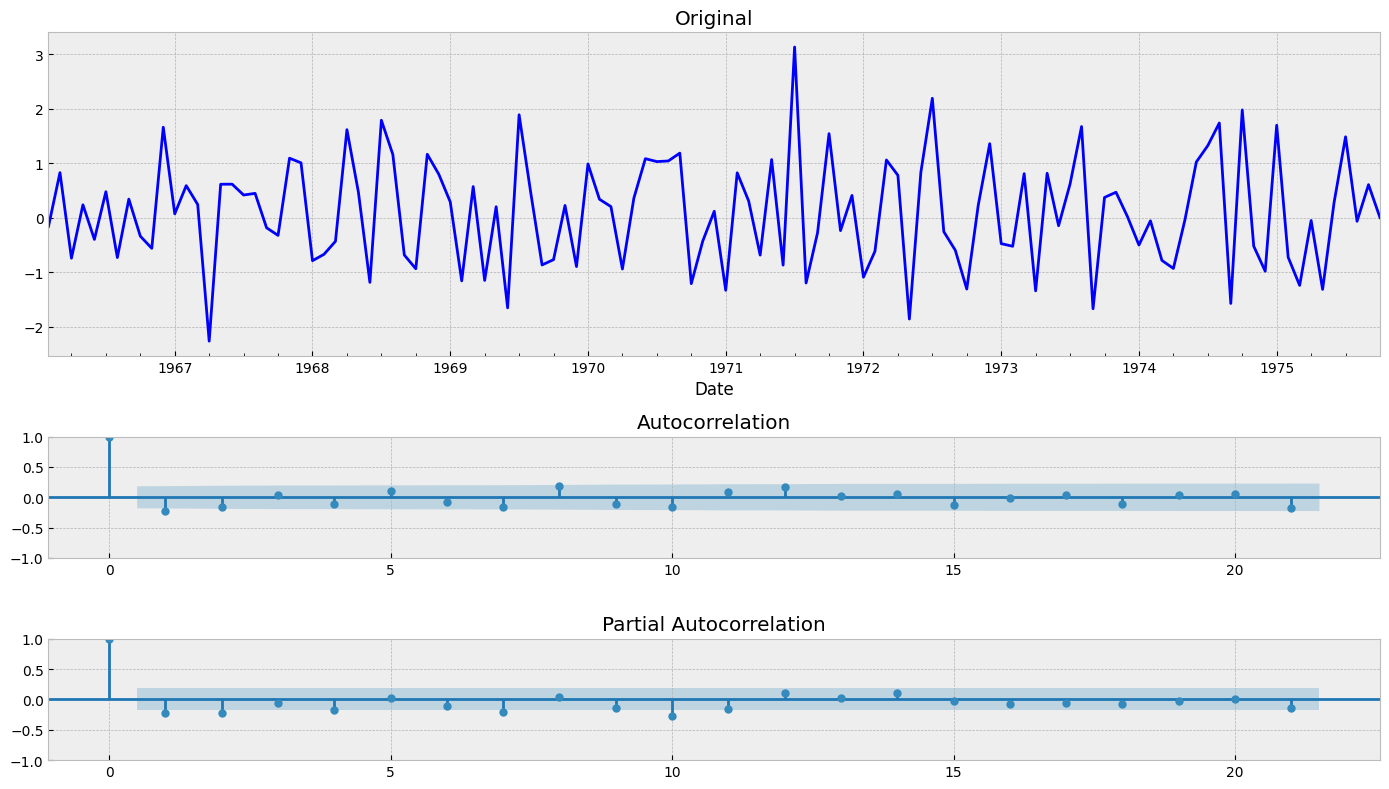

Results of Dickey-Fuller Test:
Test Statistic                 -4.264972
p-value                         0.000511
#Lags Used                     12.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


<Figure size 1000x400 with 0 Axes>

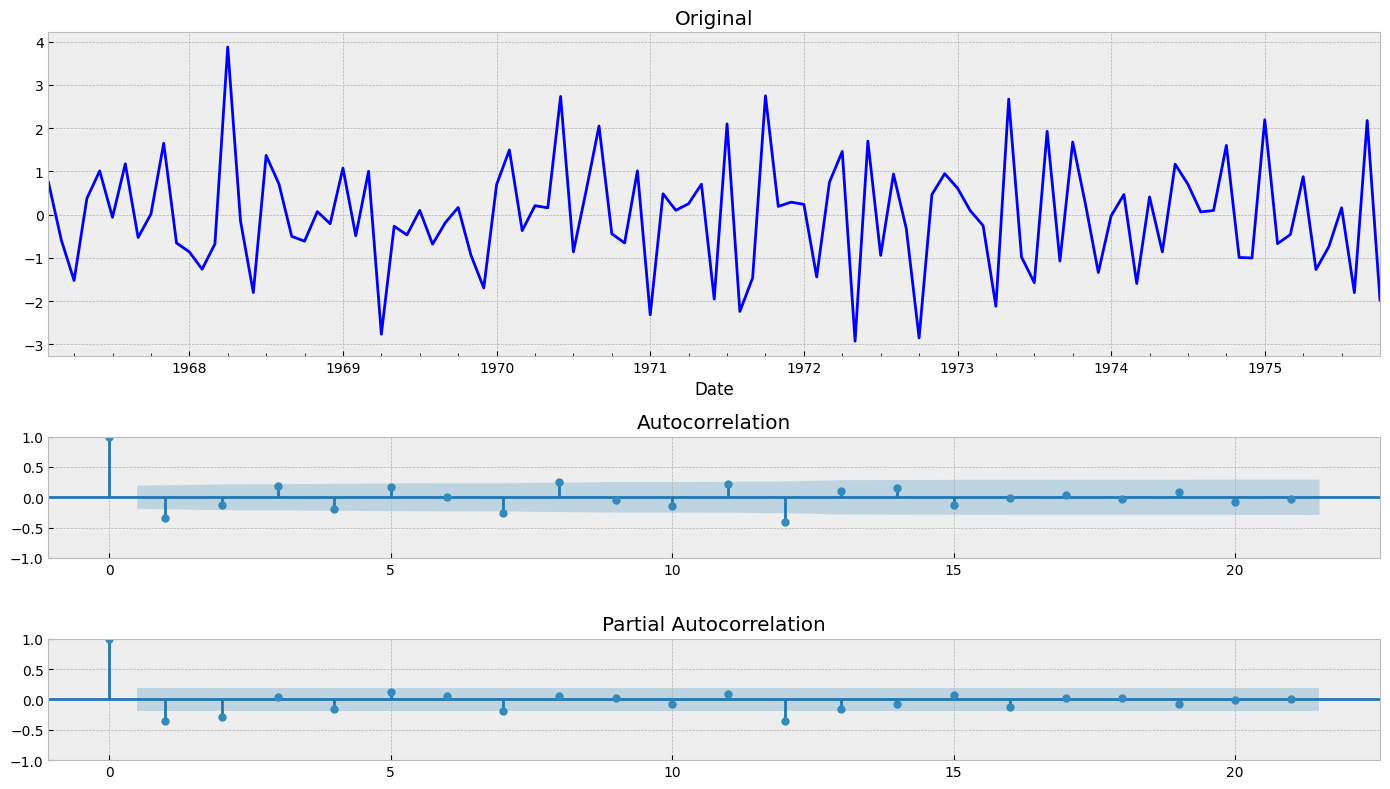

Файл: international-airline-passengers.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
            Value
Date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


<Figure size 1000x400 with 0 Axes>

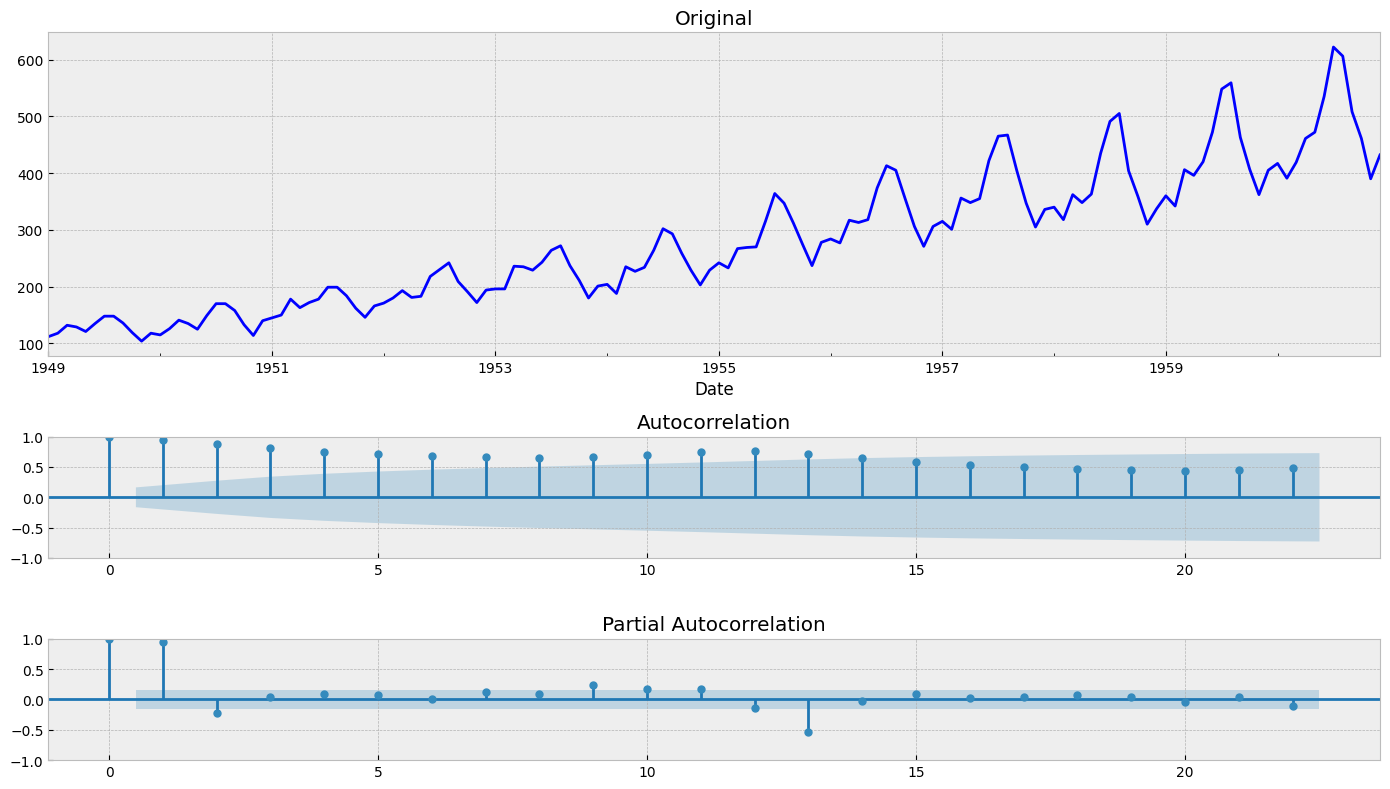

Results of Dickey-Fuller Test:
Test Statistic                  -1.326071
p-value                          0.617162
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


<Figure size 1000x400 with 0 Axes>

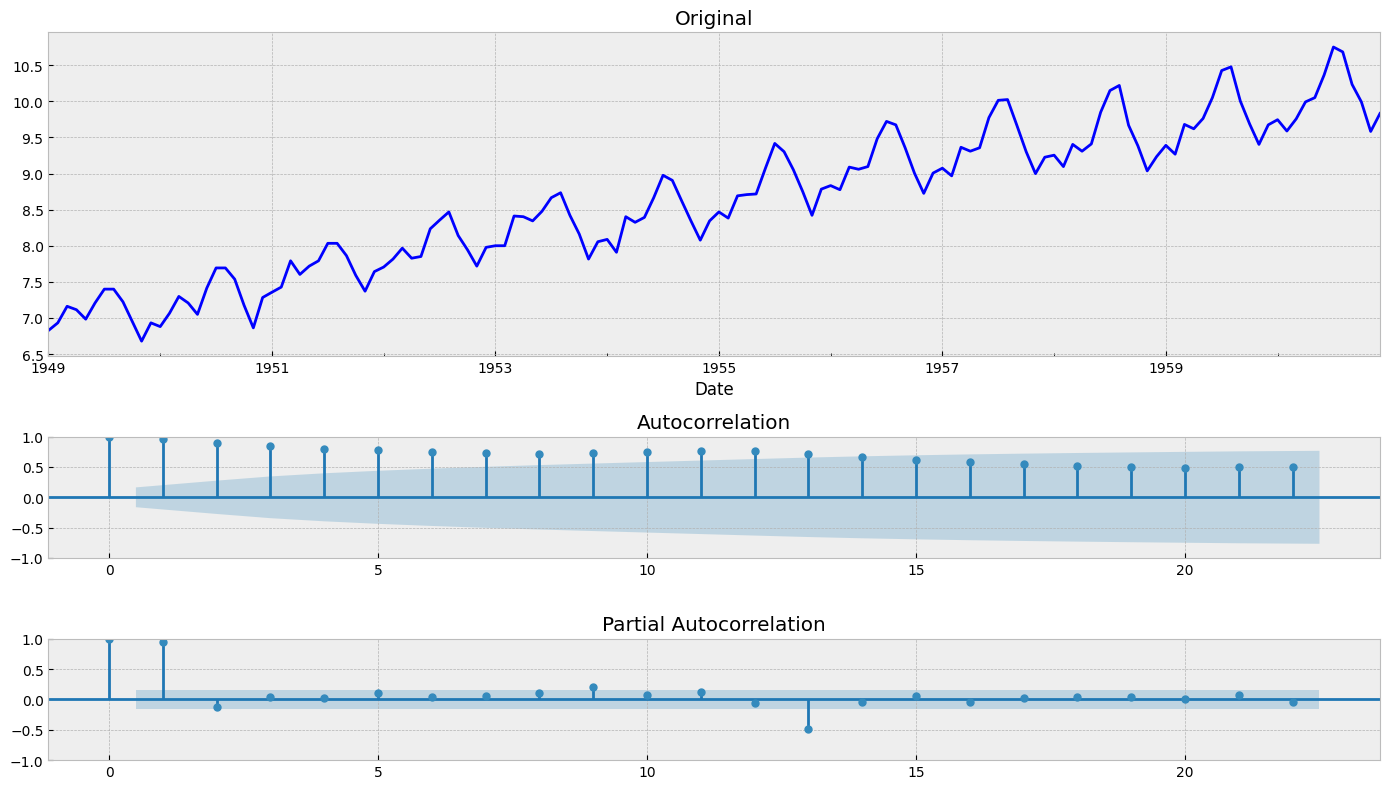

Results of Dickey-Fuller Test:
Test Statistic                  -2.871707
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


<Figure size 1000x400 with 0 Axes>

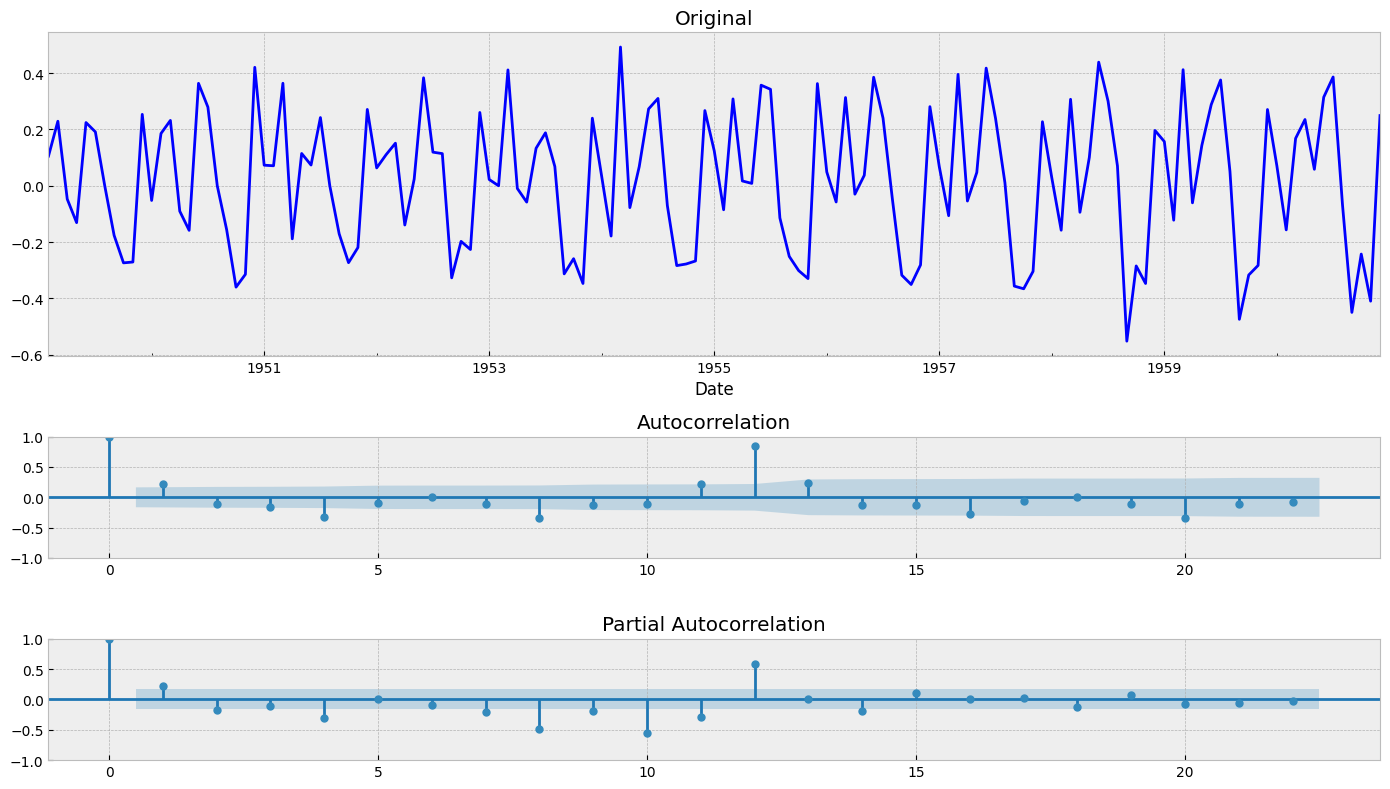

Results of Dickey-Fuller Test:
Test Statistic                  -4.393873
p-value                          0.000304
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


<Figure size 1000x400 with 0 Axes>

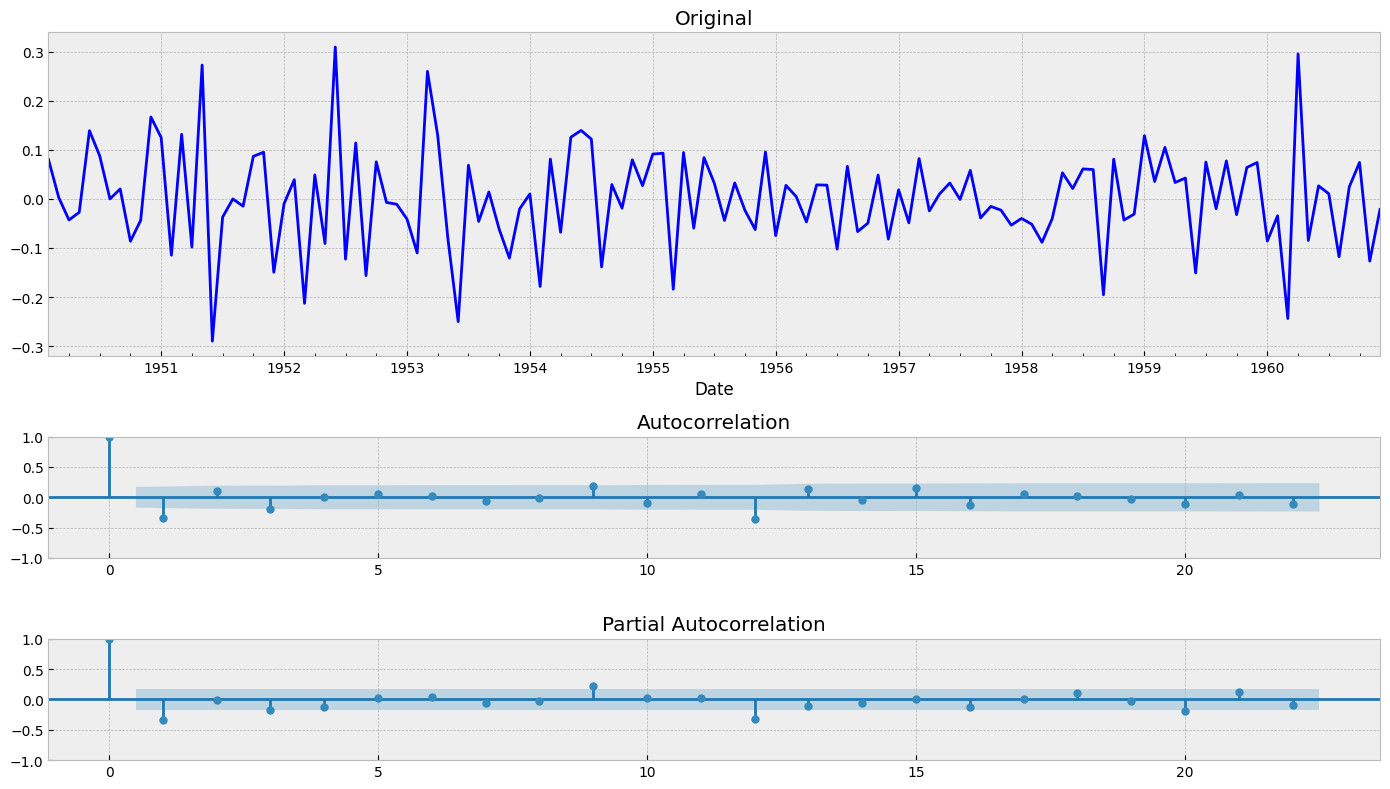

Файл: mean-monthly-air-temperature-deg.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None
            Value
Date             
1920-01-01   40.6
1920-02-01   40.8
1920-03-01   44.4
1920-04-01   46.7
1920-05-01   54.1
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


<Figure size 1000x400 with 0 Axes>

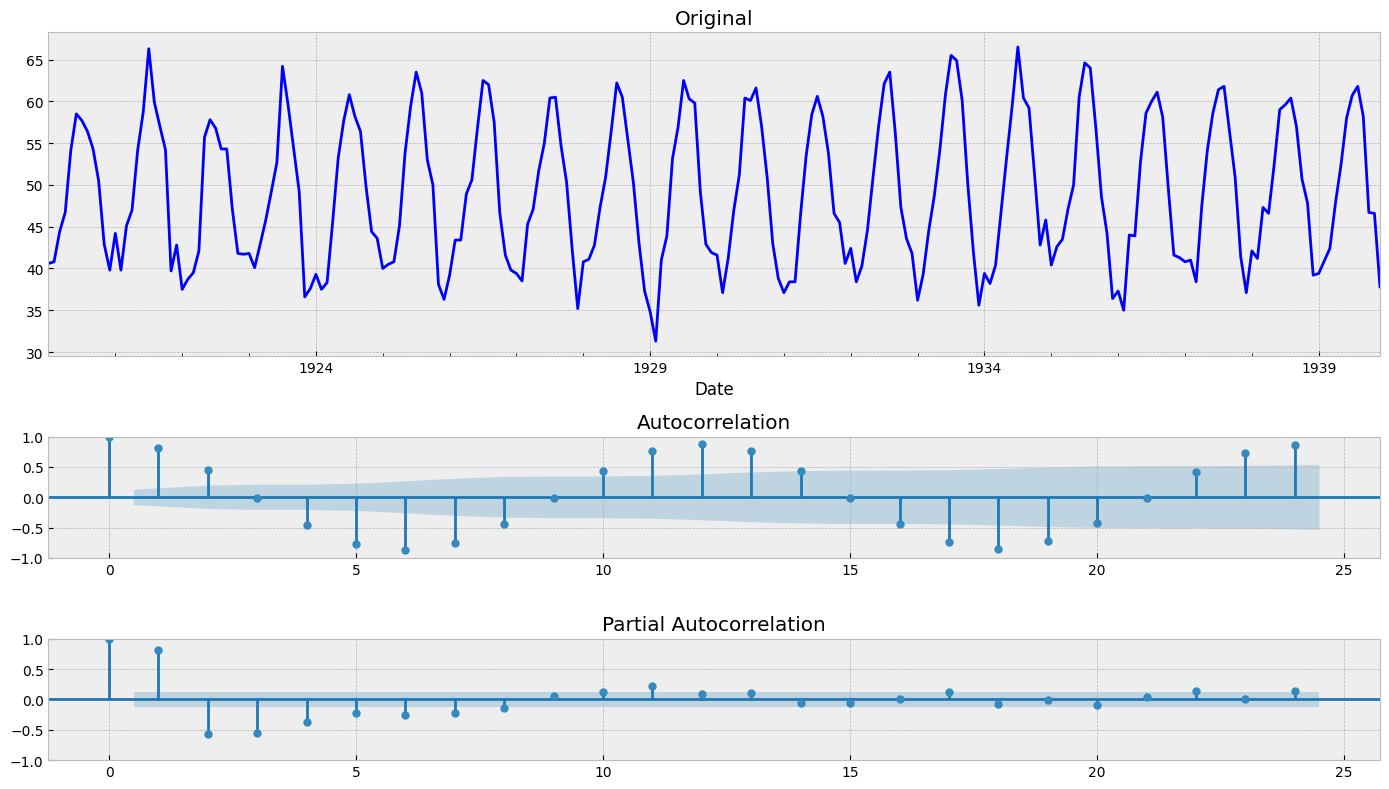

Results of Dickey-Fuller Test:
Test Statistic                  -3.736591
p-value                          0.003627
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


<Figure size 1000x400 with 0 Axes>

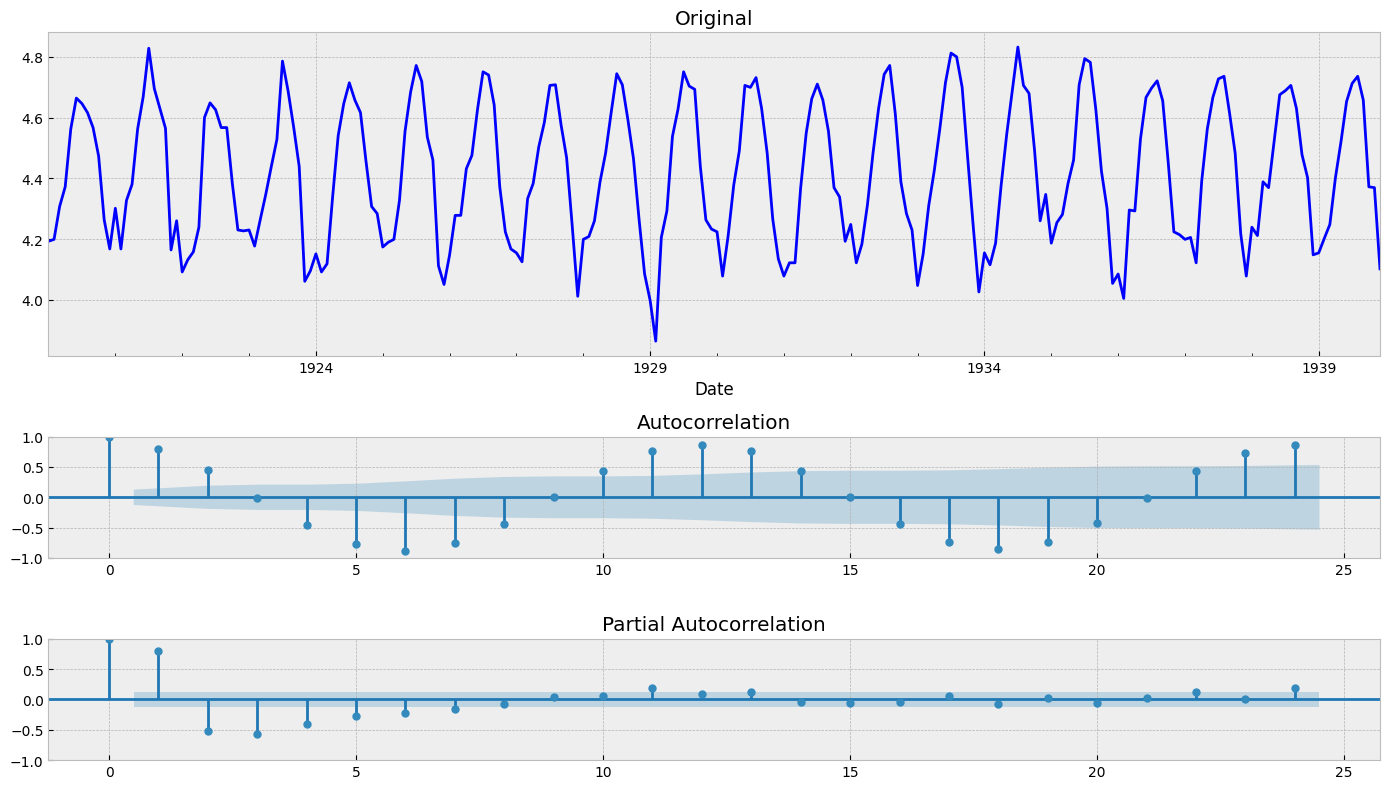

Results of Dickey-Fuller Test:
Test Statistic                -1.215240e+01
p-value                        1.559473e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

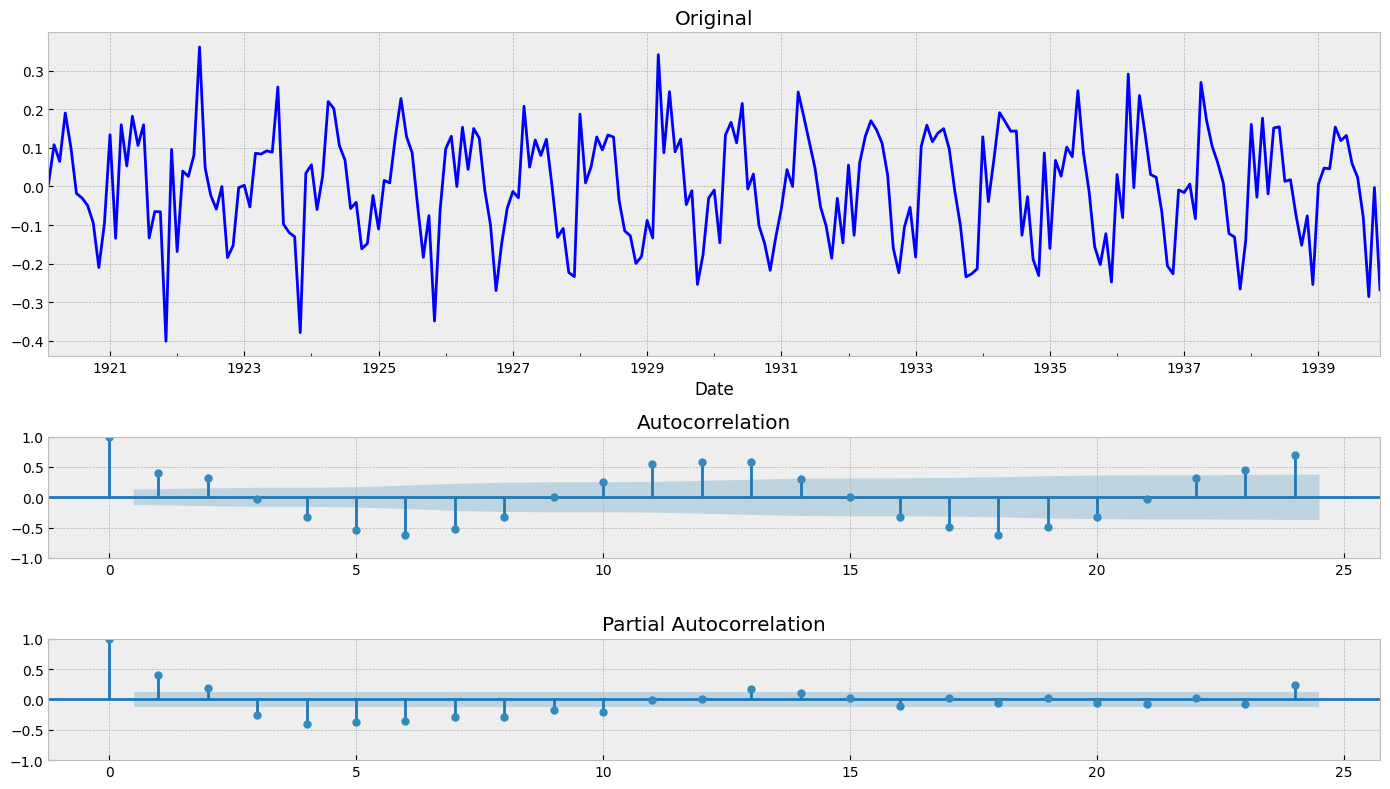

Results of Dickey-Fuller Test:
Test Statistic                -7.995091e+00
p-value                        2.416213e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

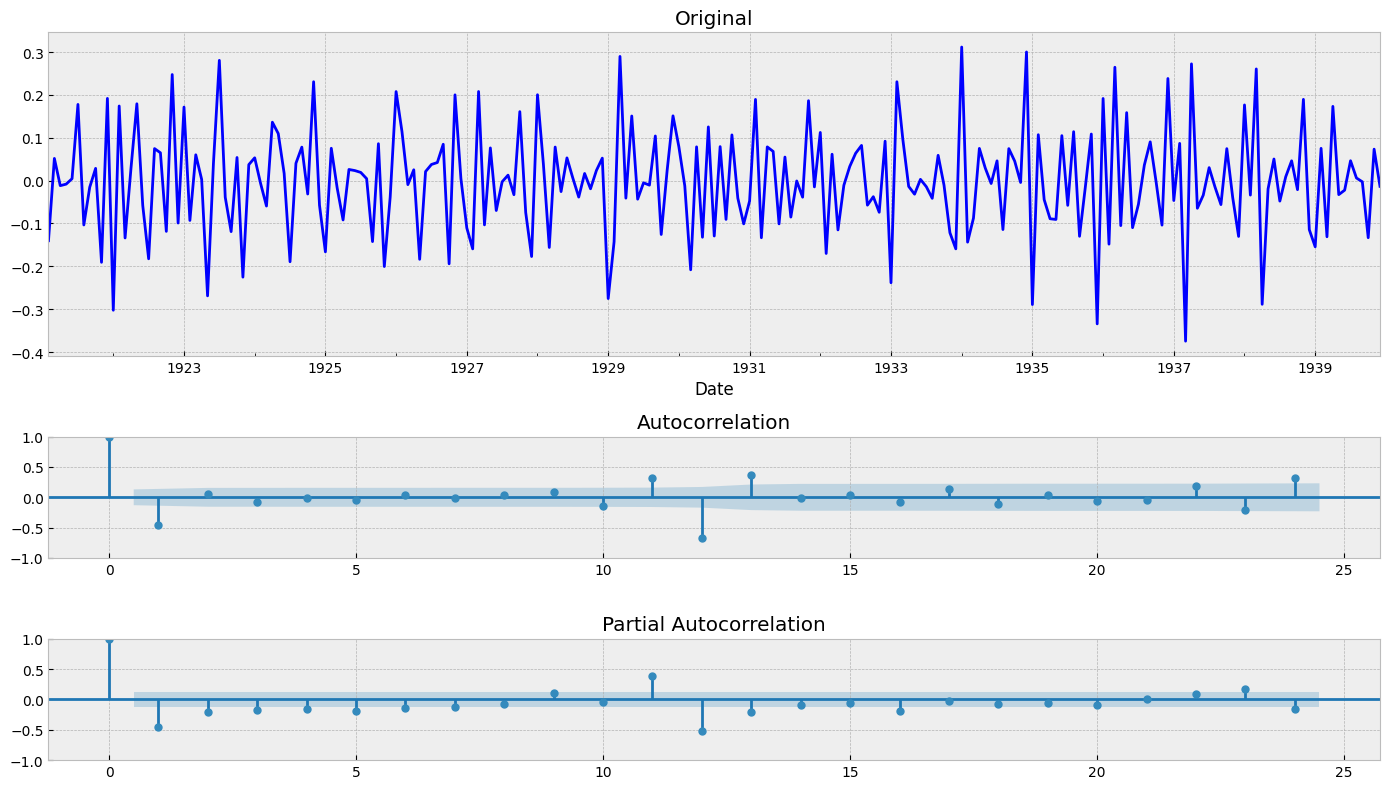

Файл: weekly-closings-of-the-dowjones-.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 1971-07-05 to 1974-08-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   162 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None
             Value
Date              
1971-07-05  890.19
1971-07-12  901.80
1971-07-19  888.51
1971-07-26  887.78
1971-08-02  858.43
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


<Figure size 1000x400 with 0 Axes>

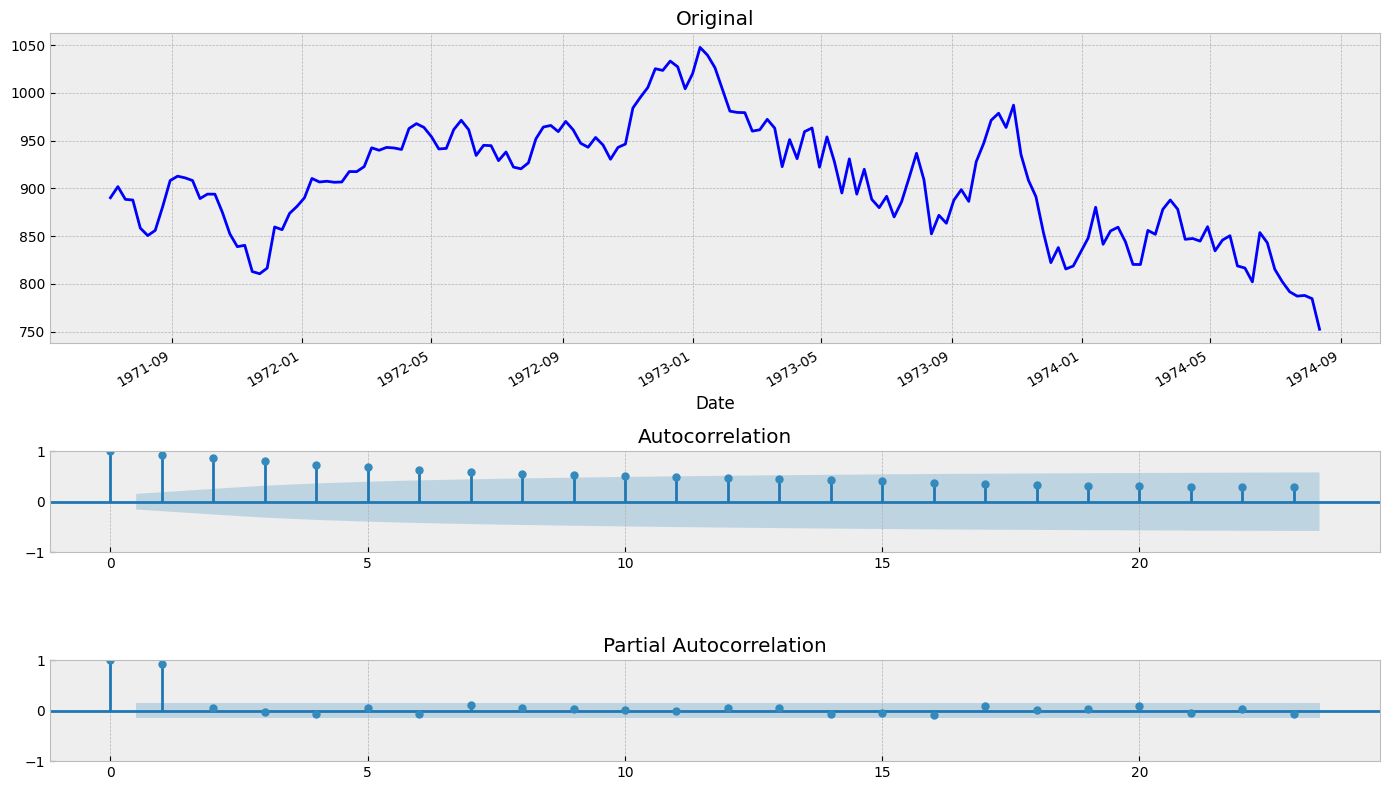

Results of Dickey-Fuller Test:
Test Statistic                  -1.327773
p-value                          0.616372
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


<Figure size 1000x400 with 0 Axes>

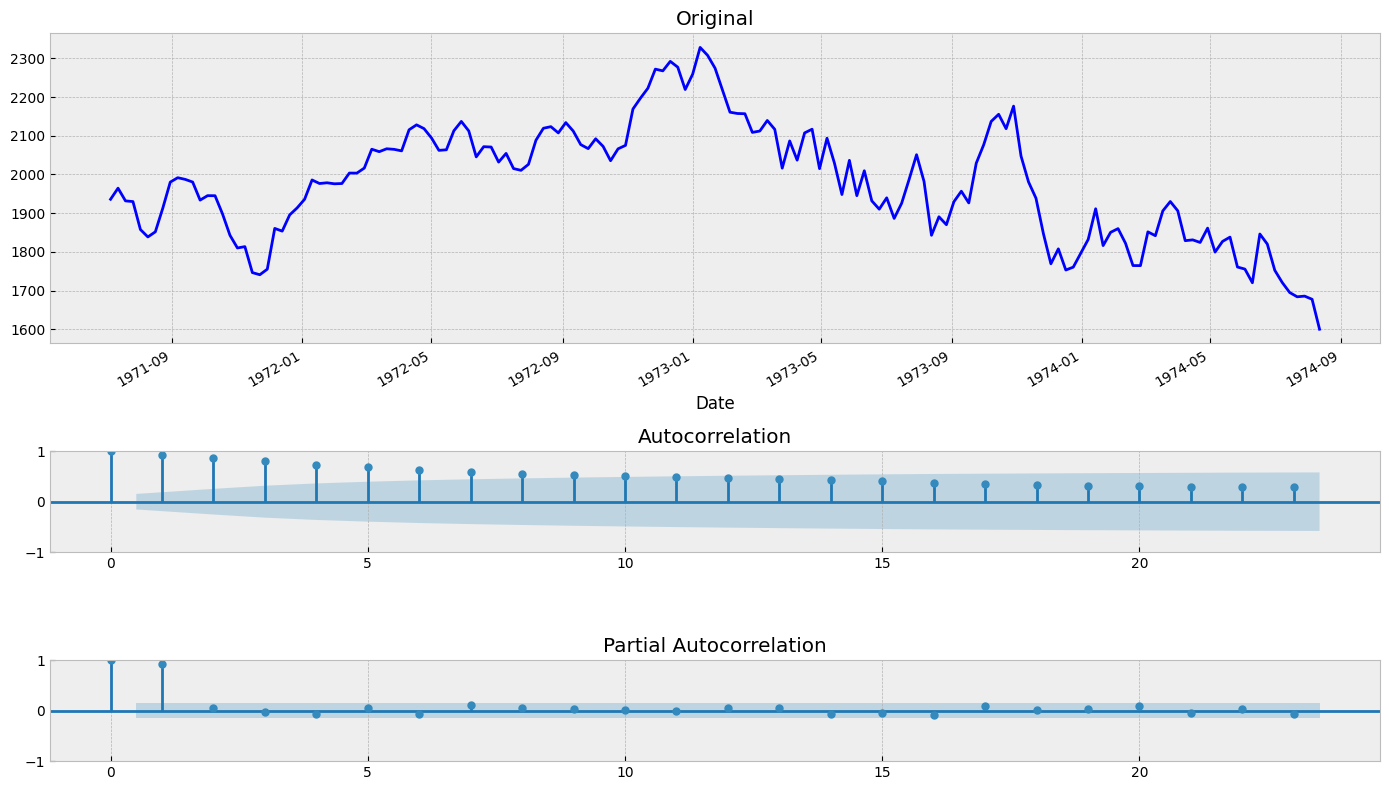

Results of Dickey-Fuller Test:
Test Statistic                -1.302750e+01
p-value                        2.382691e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

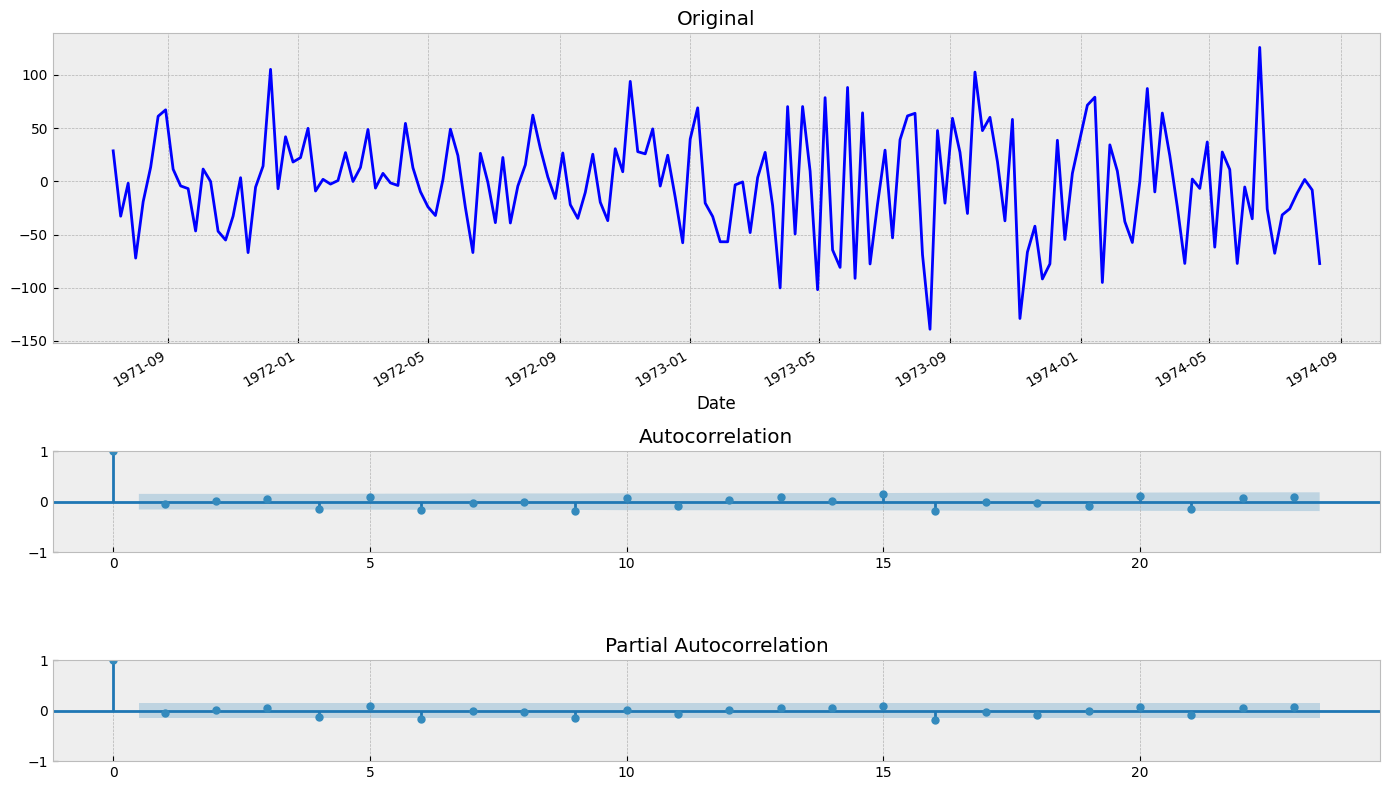

Results of Dickey-Fuller Test:
Test Statistic                  -3.356670
p-value                          0.012528
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


<Figure size 1000x400 with 0 Axes>

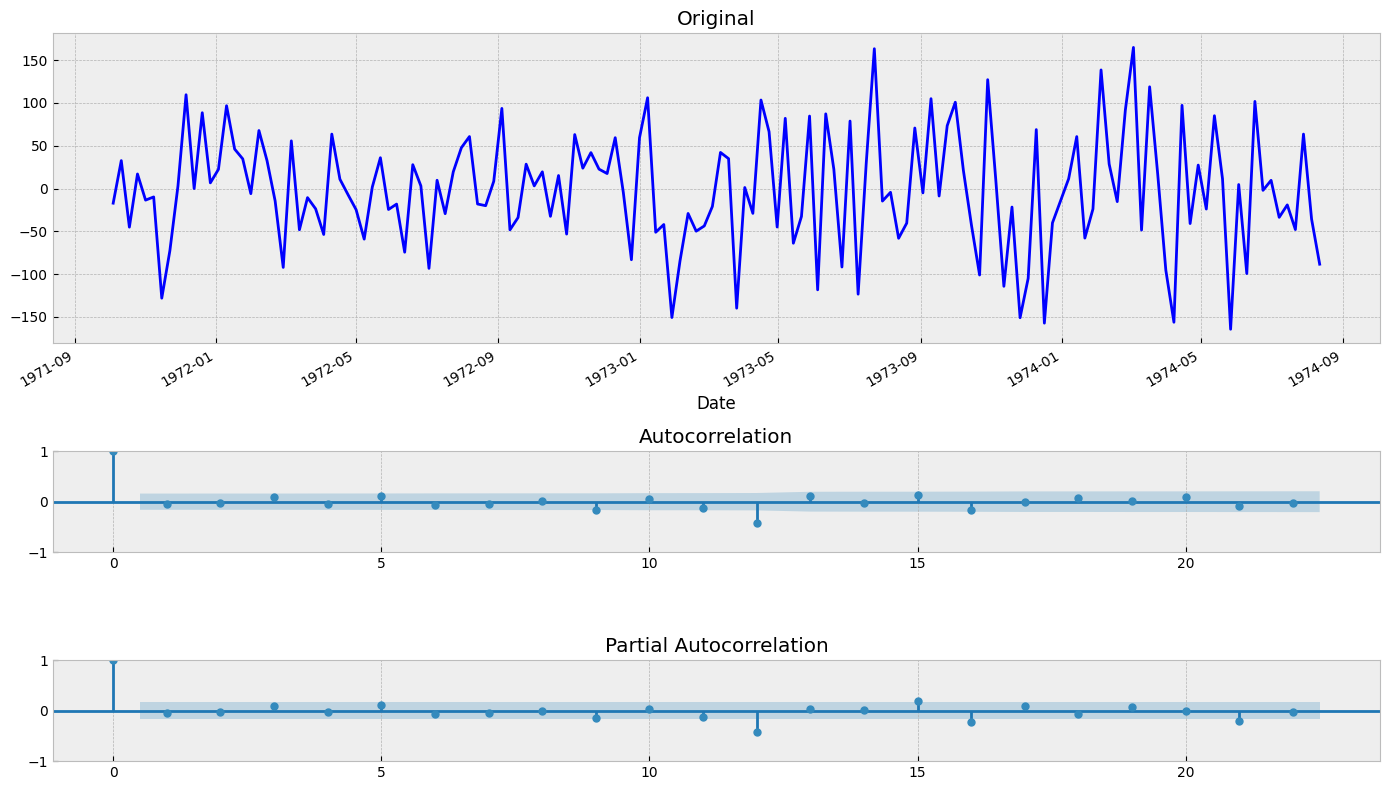

Файл: daily-total-female-births-in-cal.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None
            Value
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


<Figure size 1000x400 with 0 Axes>

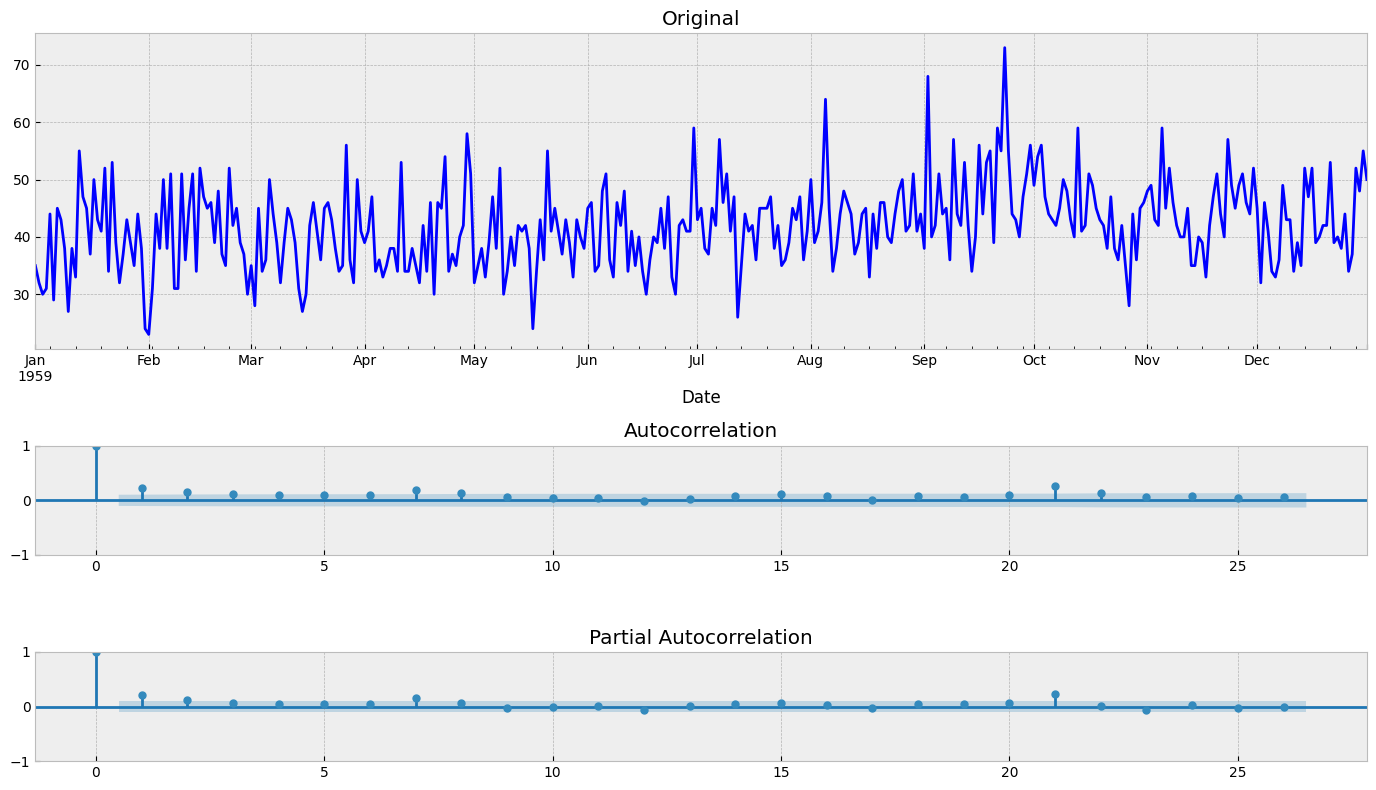

Results of Dickey-Fuller Test:
Test Statistic                  -4.344294
p-value                          0.000372
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


<Figure size 1000x400 with 0 Axes>

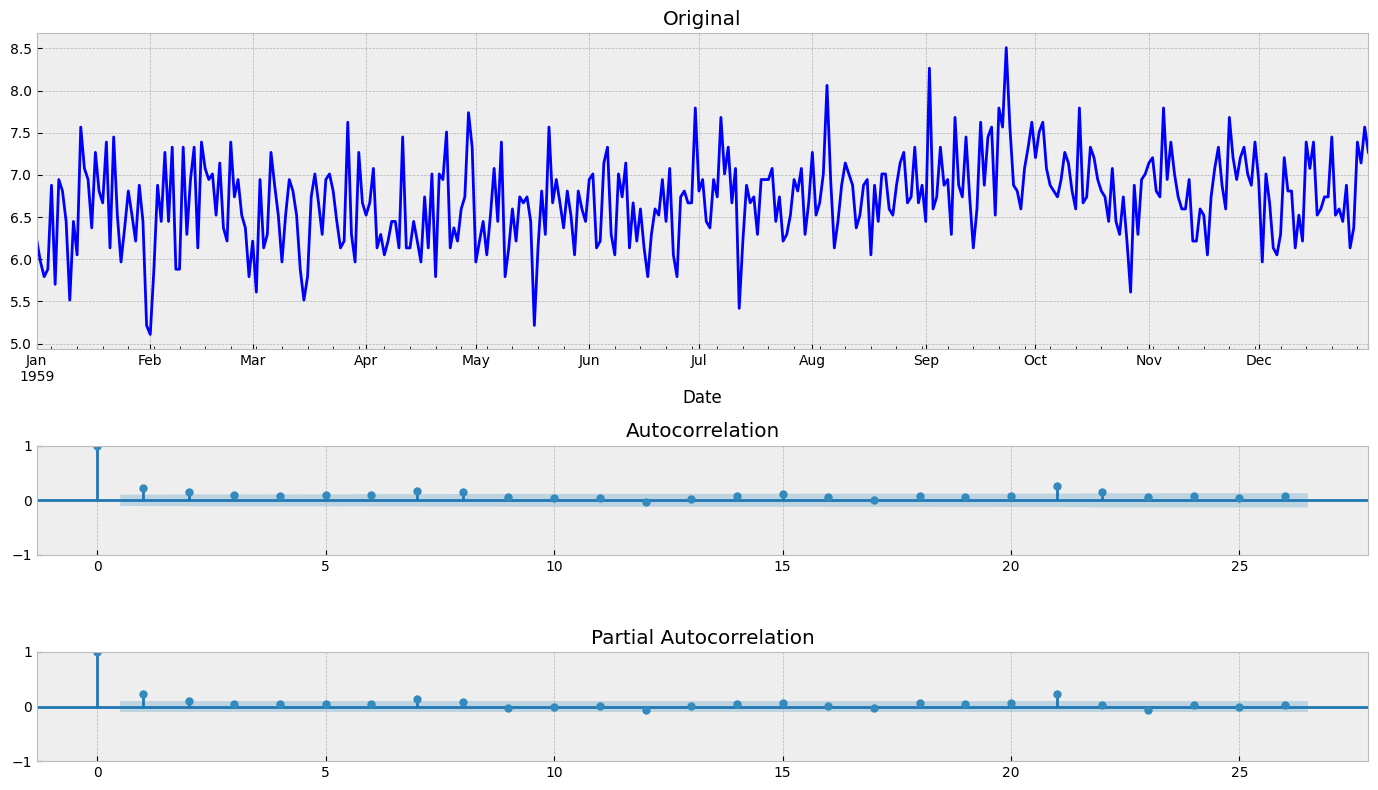

Results of Dickey-Fuller Test:
Test Statistic                -1.285895e+01
p-value                        5.159404e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

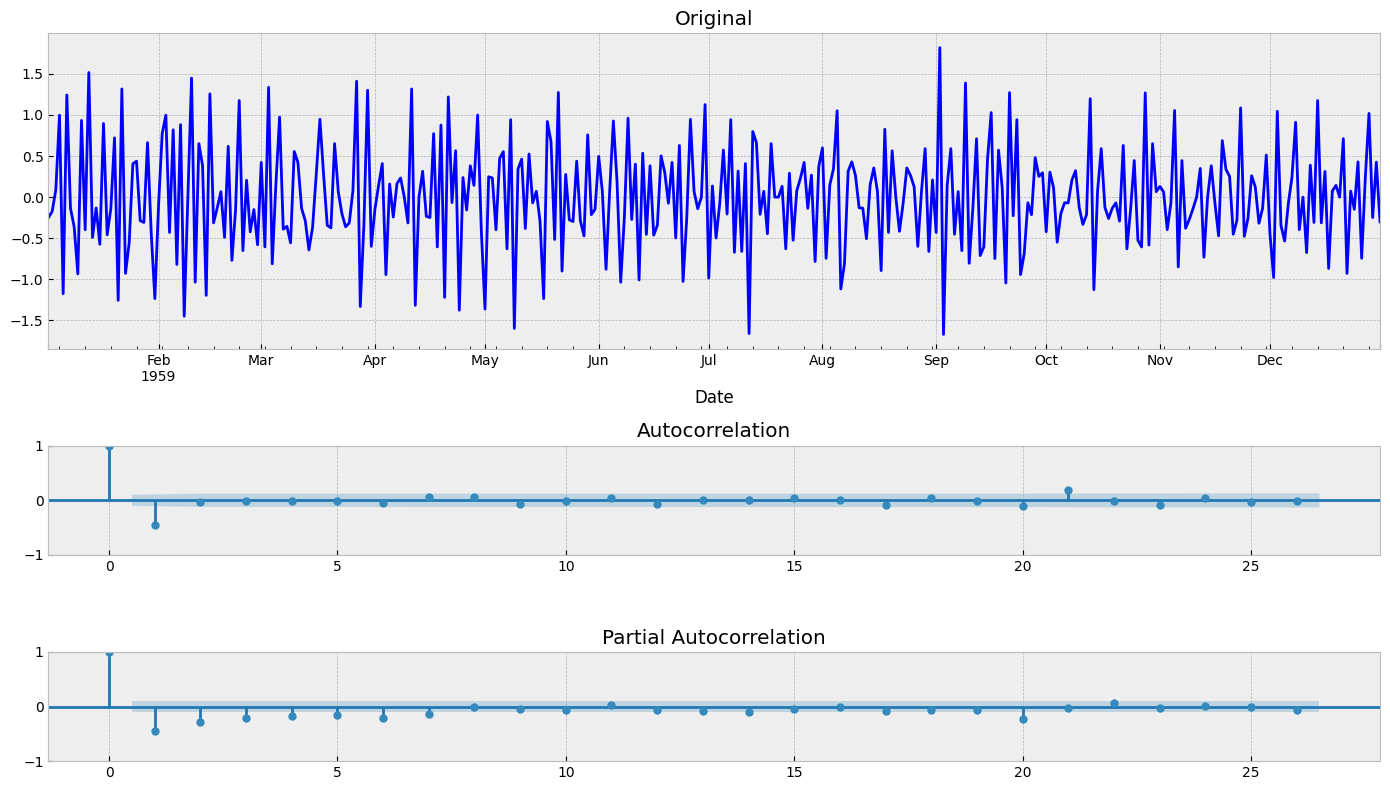

Results of Dickey-Fuller Test:
Test Statistic                -8.720838e+00
p-value                        3.389037e-14
#Lags Used                     1.700000e+01
Number of Observations Used    3.340000e+02
Critical Value (1%)           -3.450081e+00
Critical Value (5%)           -2.870233e+00
Critical Value (10%)          -2.571401e+00
dtype: float64


<Figure size 1000x400 with 0 Axes>

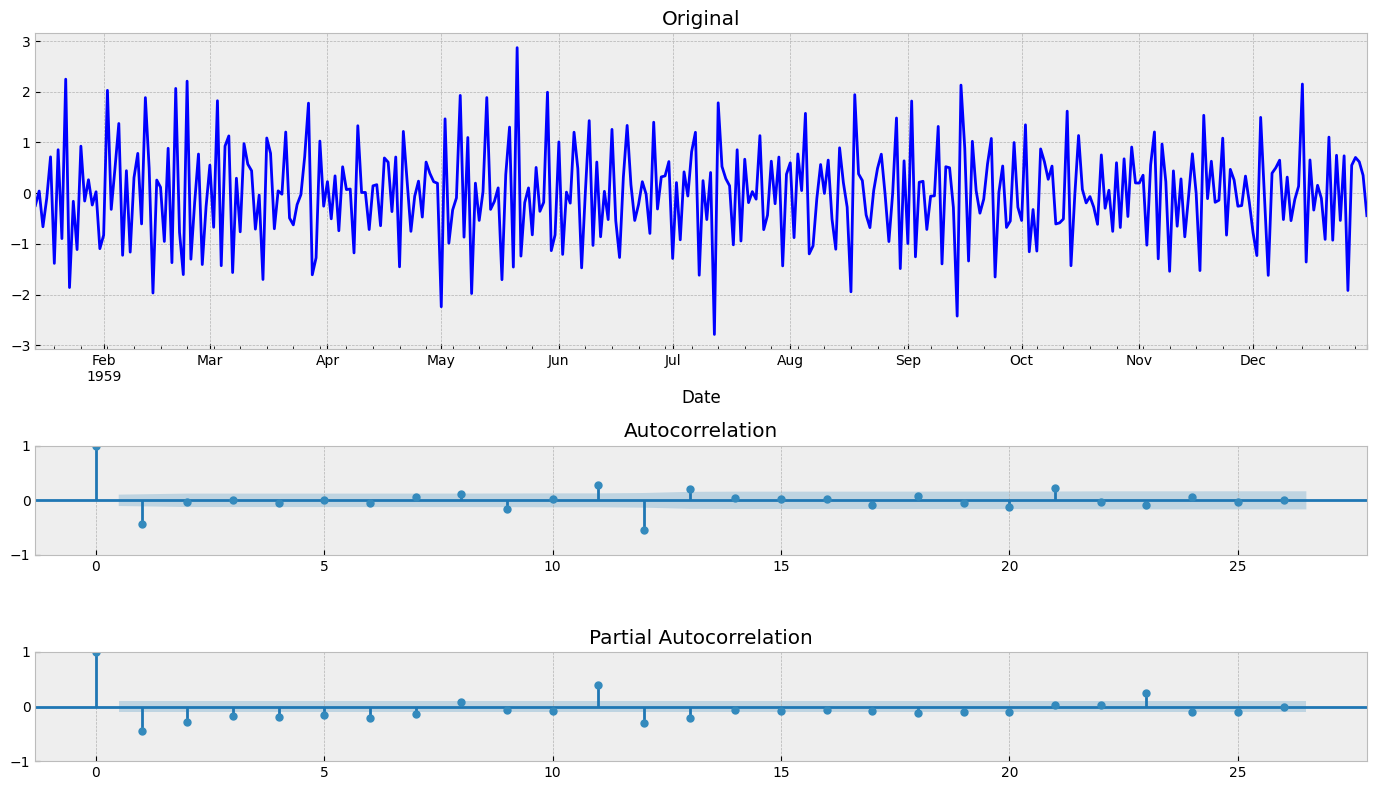

In [54]:
# Построение графиков для всех файлов
for i, file in enumerate(files, 1):
    df = load_series(file)
    print(f"Файл: {file}")
    print(df.info())  # Проверка данных
    print(df.head())  # Проверка первых строк

    plt.figure(figsize=(10, 4))
    tsplot(df['Value'])  # Исходные данные
    plt.show()

    df['BoxCox'], lambda_bc = boxcox(df['Value'])
    plt.figure(figsize=(10, 4))
    tsplot(df['BoxCox'])
    plt.show()

    df['Diff1'] = df['BoxCox'].diff().dropna()
    plt.figure(figsize=(10, 4))
    tsplot(df['Diff1'].dropna())
    plt.show()

    df['Diff12'] = df['Diff1'].diff(12).dropna()
    plt.figure(figsize=(10, 4))
    tsplot(df['Diff12'].dropna())
    plt.show()